Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from pandas import melt
from seaborn import FacetGrid

Loading the dataset and exploring it by looking at values, types and statistics. Then looking for null values that are only in the total bedrooms field and replacing them with the median value.

In [2]:
# Load the dataset (make sure to replace the path with the actual file path)
path = '/content/drive/MyDrive/housing.csv'
data = pd.read_csv(path)
# Esplorare il dataset
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
print(data.isnull().sum())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

Encoding of the only object type feature that is ocean_proximity by giving each value a label from 0 to 4 and
plotting of the graph for the elbow method trying a range from 1 to 10 clusters. We can see that the best number is 3 or 4

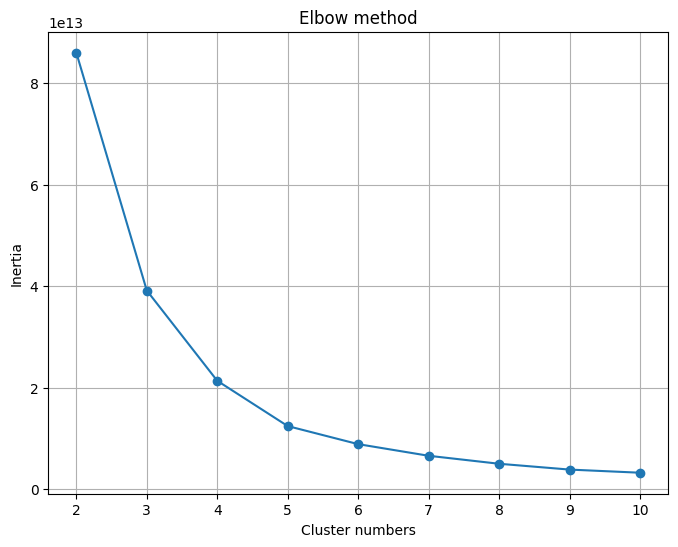

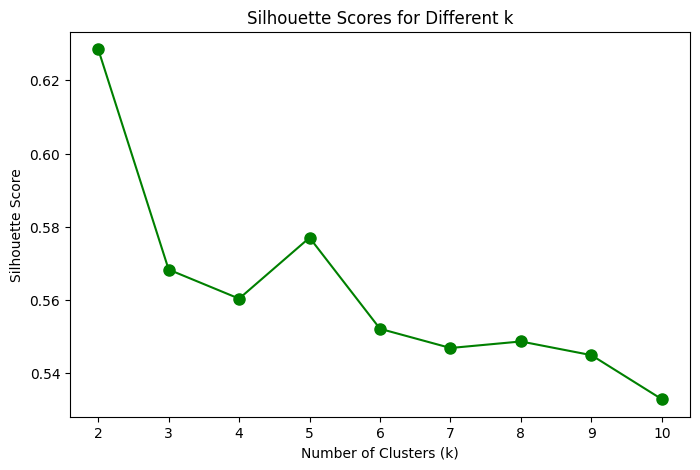

In [3]:
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

raw_data = data.select_dtypes(include=[np.number])

# Computing inertia for elbow method and silhouette score
inertia = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=23)
    clusters = kmeans.fit_predict(raw_data)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(raw_data, clusters)
    silhouette_scores.append(sil_score)

# Plot Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Cluster numbers')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'go-', markersize=8)
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

Plotting the frequency of the features of the dataset so we can have a visible idea of them, like distribution and outliers.

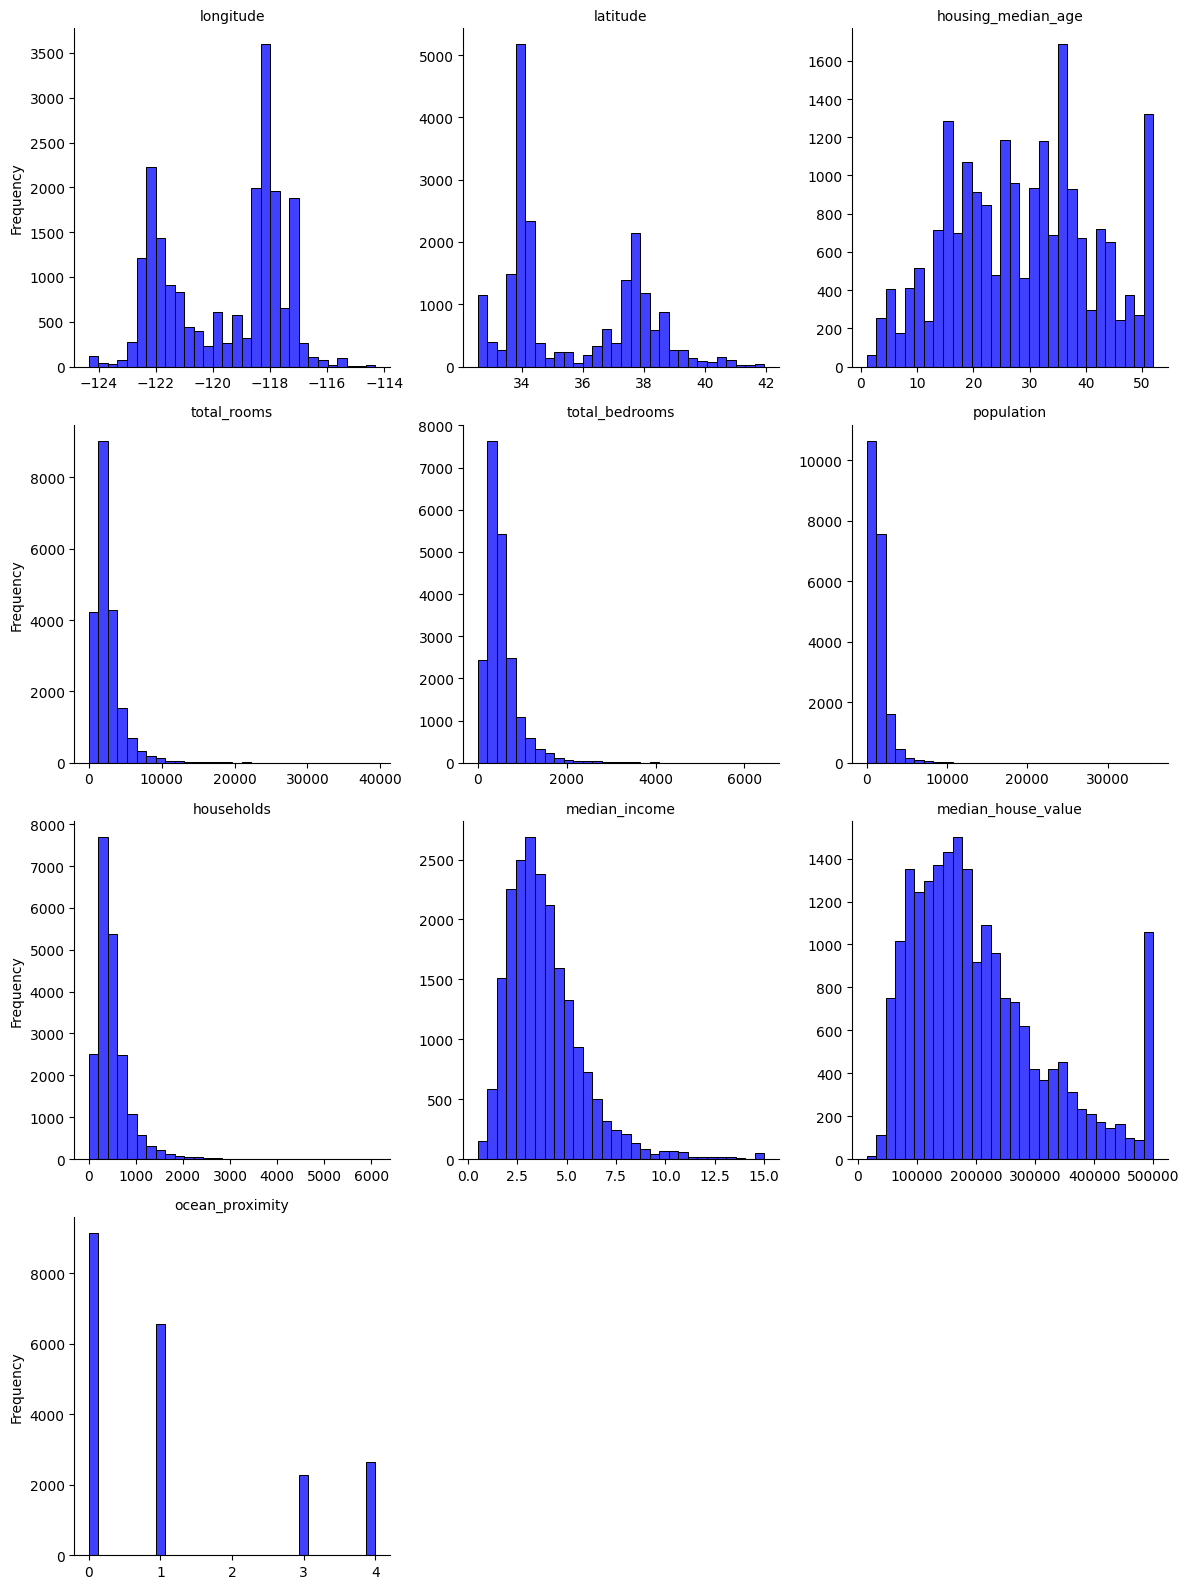

In [4]:
data_melted = melt(data, value_vars=raw_data)

# Use a grid for plotting all the graphs
g = FacetGrid(data_melted, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", bins=30, color="blue", kde=False)
g.set_titles("{col_name}")
g.set_axis_labels("", "Frequency")
plt.tight_layout()
plt.show()

Run the k-means++ algorithm on the optimal number of clusters and plotting the result of the clustering on latitude and longitude.

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  \
0       322.0       126.0         8.3252            452600.0                3   
1      2401.0      1138.0         8.3014            358500.0                3   
2       496.0       177.0         7.2574            352100.0                3   
3       558.0       219.0         5.6431            341300.0                3   
4       565.0       259.0         3.8462            342200.0                3   

   Cluster  
0        0  
1        2  
2        2  
3        2

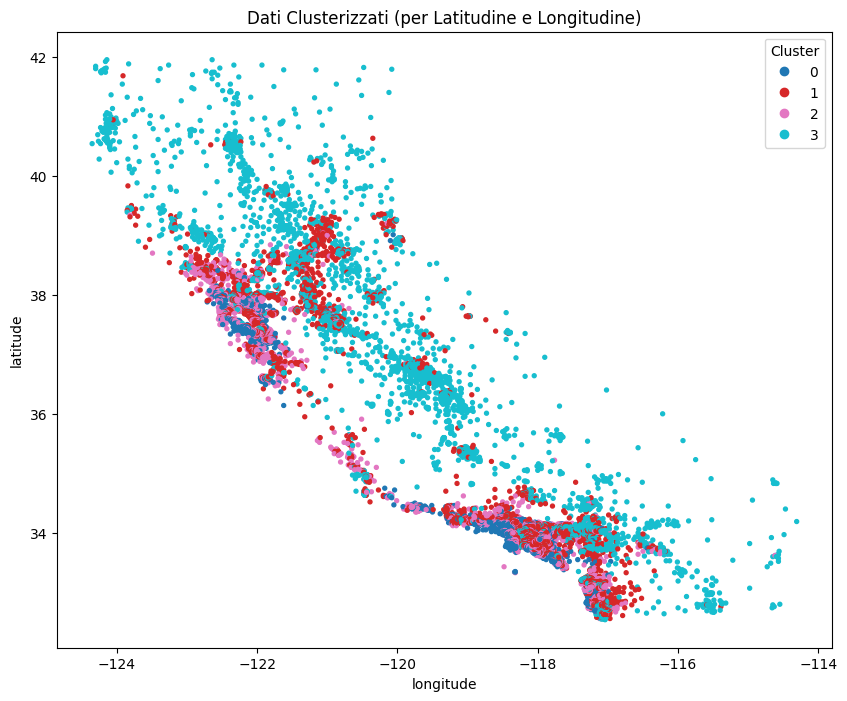

In [5]:
# K-means++ with optimal number of clusters from elbow method
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=23)
data['Cluster'] = kmeans.fit_predict(raw_data)

print(data.head())

# Plotting of the result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude'],data['latitude'], c=data['Cluster'], marker='o',cmap='tab10', s=8)
plt.title('Dati Clusterizzati (per Latitudine e Longitudine)')
plt.xlabel('longitude')
plt.ylabel('latitude')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()

Without preprocessing we can see that the clusters, even if plotted from multidimensional k-means++ are not separated and lot of points of one cluster overlap with points of others.

Running k-means++ only on 2 features, longitude and latitude, and plotting the results with the centroids.

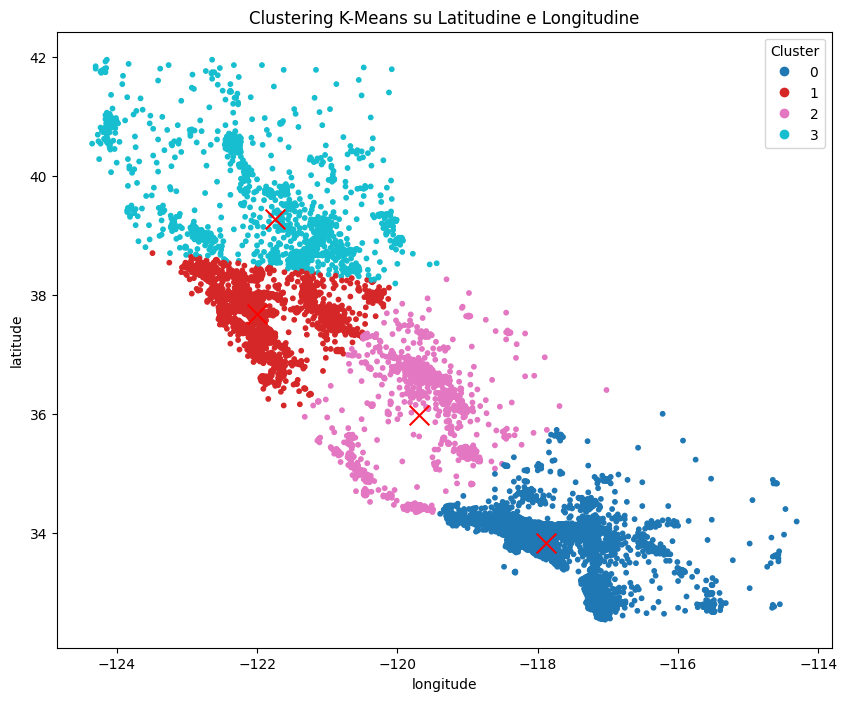

In [6]:
lat_lon_data = data[['longitude','latitude']]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=23)
data['Cluster'] = kmeans.fit_predict(lat_lon_data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='tab10', marker='o', s=10)
plt.title('Clustering K-Means su Latitudine e Longitudine')
plt.xlabel('longitude')
plt.ylabel('latitude')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroidi')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.show()

By running and plotting k-means++ only on latitude and longitude we can see that even if without preprocessing the clusters are well separated and defined.

Processing the data by OneHotEncoding the ocean_proximity and scaling with the standard scaler and minmax scaler the others numerical features. Then plot the elbow method and silhouette scores for clusters from 1 to 25 and watching that the best numbers are 6 or 7

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  Cluster  \
0       322.0       126.0         8.3252            452600.0        1   
1      2401.0      1138.0         8.3014            358500.0        1   
2       496.0       177.0         7.2574            352100.0        1   
3       558.0       219.0         5.6431            341300.0        1   
4       565.0       259.0         3.8462            342200.0        1   

   ocean_proximity_0  ocean_proximity_1  ocean_proximity_2  ocean_proximity_3  \
0              False         

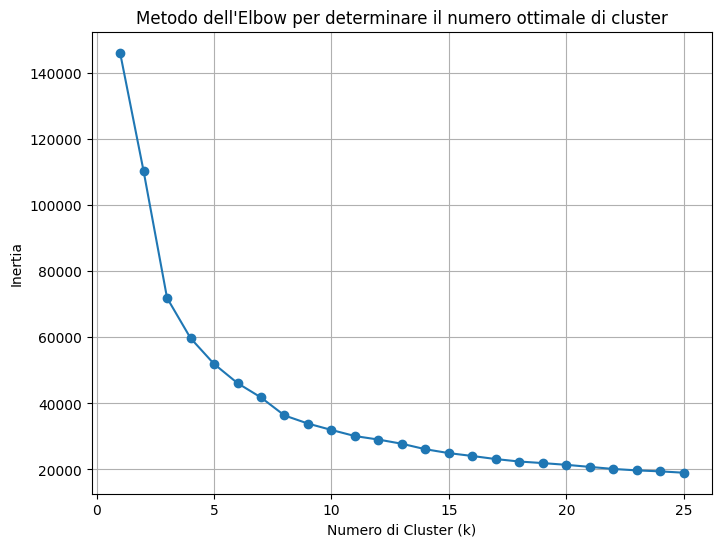

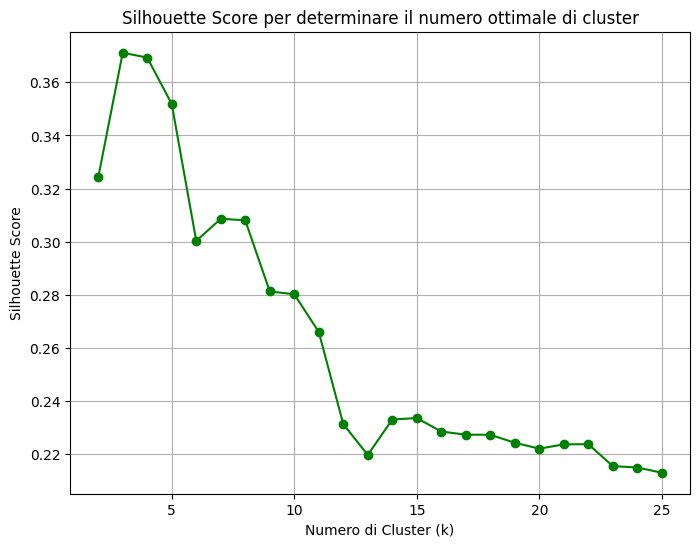

In [7]:
# One-Hot Encoding of 'ocean_proximity'
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=False)

print(data_encoded.head())

numerical_data = data_encoded.select_dtypes(include=[np.number])

# identify columns to scale with different scalers
standard_scaler_features = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']
minmax_scaler_features = ['median_income', 'housing_median_age']

# building of scalers
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_scaler_features),
        ('minmax', MinMaxScaler(), minmax_scaler_features)
    ])

# Scale numerical data
scaled_data = scaler.fit_transform(numerical_data)

# Computing inertia for elbow method
inertia = []
for k in range(1, 26):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=23)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 26), inertia, marker='o')
plt.title('Metodo dell\'Elbow per determinare il numero ottimale di cluster')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Computing silhouette scores
silhouette_scores = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=23)
    kmeans.fit(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot of Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 26), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score per determinare il numero ottimale di cluster')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Running the k-means++ algorithm with the features encoded and scaled and the number of clusters equals to 7 given by elbow method. Plot then the result by looking at the latitude and longitude.

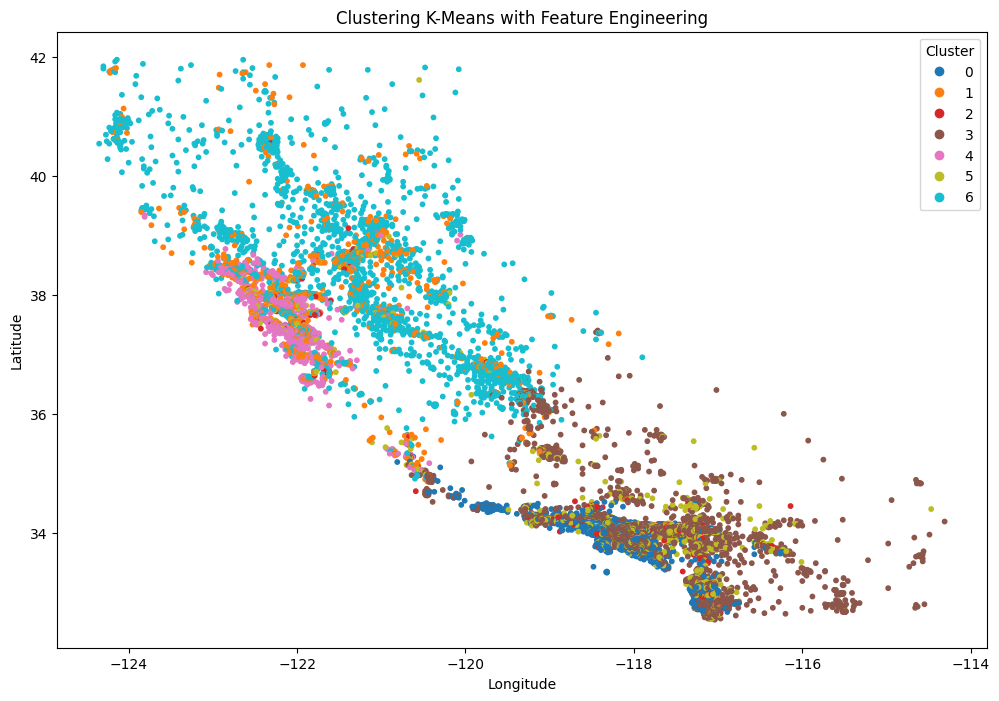

In [8]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=23)

data_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_encoded['longitude'], data_encoded['latitude'],
                      c=data_encoded['Cluster'], cmap='tab10', marker='o', s=10)
plt.title('Clustering K-Means with Feature Engineering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()

Instead, with preprocessing we can see that the clusters, even if plotted from multidimensional k-means++ are more separated and not so many points of one cluster overlap with points of others, so is a big upgrade from the first try.

Running k-means++ only on latitude and longitude by scaling them and using the optimal number of clusters that is 7. Showing how the two features are scaled and plotting the graph with centroids.

       latitude  longitude
0         37.88    -122.23
1         37.86    -122.22
2         37.85    -122.24
3         37.85    -122.25
4         37.85    -122.25
...         ...        ...
20635     39.48    -121.09
20636     39.49    -121.21
20637     39.43    -121.22
20638     39.43    -121.32
20639     39.37    -121.24

[20640 rows x 2 columns]
[[ 1.05254828 -1.32783522]
 [ 1.04318455 -1.32284391]
 [ 1.03850269 -1.33282653]
 ...
 [ 1.77823747 -0.8237132 ]
 [ 1.77823747 -0.87362627]
 [ 1.75014627 -0.83369581]]


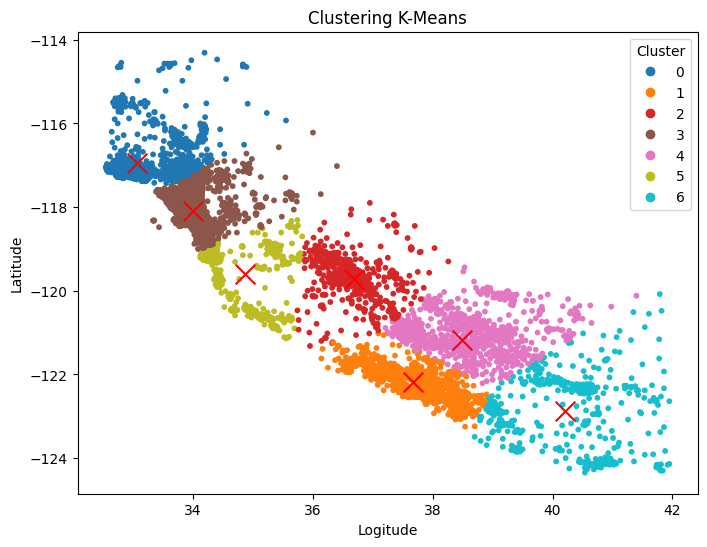

In [9]:
lat_lon_data = data[['latitude', 'longitude']]

scaler = StandardScaler()
lat_lon_scaled = scaler.fit_transform(lat_lon_data)
print(lat_lon_data)
print(lat_lon_scaled)

kmeans = KMeans(n_clusters=7, init='k-means++', random_state=23)
data_encoded['Cluster'] = kmeans.fit_predict(lat_lon_scaled)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(lat_lon_data['latitude'], lat_lon_data['longitude'],
                      c=data_encoded['Cluster'], cmap='tab10', marker='o', s=10)

centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            c='red', s=200, marker='x', label='Centroidi')
plt.title('Clustering K-Means')
plt.xlabel('Logitude')
plt.ylabel('Latitude')

handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

plt.show()

By running and plotting k-means++ only on scaled latitude and longitude we can see that the clusters are very well separated and defined and the centroids are on optimal position.  